In [2]:
from qiskit import __version__
print(__version__)

2.0.1


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

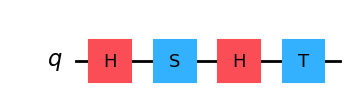

In [4]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

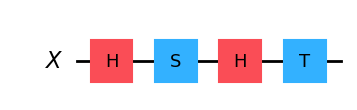

In [5]:
## define custom name for this register
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output="mpl"))

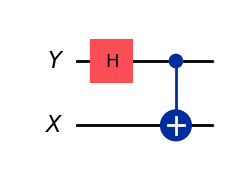

<IPython.core.display.Latex object>

In [9]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y,X)
circuit.h(Y)
## qiskit handles the identity operation to X
circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

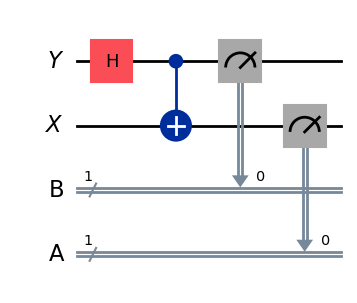

In [11]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
## implement two classical registers
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw(output="mpl"))

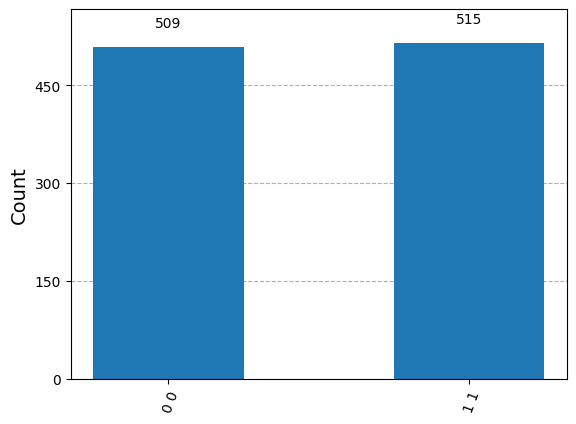

In [13]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()

## run our previous circuit on the AerSimulator to view how likely each state is
display(plot_histogram(statistics))